In [27]:
!pip install pandas nltk seaborn wordcloud matplotlib

In [29]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\eddsw\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [35]:
# Load the dataset
file_path = 'british_airways_reviews.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')
# Display first few rows
display(df.head())

,header,author,date,place,content,aircraft,trip_verified,type_of_traveller,seat_type,route,date_flown,recommended,rating,seat_comfort,cabin_staff_service,food_&_beverages,ground_service,value_for_money,inflight_entertainment
0,âfood has really gone downhillâ,John Prescott,2025-02-14,United Kingdom,"First the good news, the club suites are such ...",A350-1000,True,Couple Leisure,Business Class,London to Nairobi,25-Feb,no,4,4.0,1.0,2.0,3.0,3,NaN
1,"""thoroughly enjoyed this flight""",A Hashin,2025-02-14,United Kingdom,I have never travelled with British airways ...,A380,True,Solo Leisure,Economy Class,Dubai to London Heathrow,25-Feb,yes,9,4.0,5.0,5.0,5.0,5,4.0
2,âcustomer support was terribleâ,L Martin,2025-02-07,Switzerland,"Terrible overall, medium service and the fligh...",NaN,True,Couple Leisure,Economy Class,Zurich to London,24-Dec,no,1,2.0,2.0,1.0,1.0,1,1.0
3,"""a really enjoyable experience""",Paul Lee,2025-02-01,United Kingdom,London Heathrow to Male In new business clas...,Boeing 777,True,Couple Leisure,Business Class,London to Male,25-Jan,yes,9,5.0,5.0,4.0,5.0,4,5.0
4,"""Very good flight""",Guy Senior,2025-01-20,United Kingdom,Very good flight following an equally good fli...,A320,False,Solo Leisure,Business Class,London Heathrow to Zurich,25-Jan,yes,9,3.0,4.0,4.0,4.0,4,NaN


In [37]:
# Data Cleaning
# Remove duplicates
df.drop_duplicates(inplace=True)
# Drop rows with missing review content
df.dropna(subset=['content'], inplace=True)

# Text Cleaning: Remove special characters, extra spaces
df['content'] = df['content'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', str(x)))

In [39]:
# Sentiment Analysis
sia = SentimentIntensityAnalyzer()
df['sentiment_score'] = df['content'].apply(lambda x: sia.polarity_scores(x)['compound'])

def classify_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['sentiment_score'].apply(classify_sentiment)

C:\Users\eddsw\AppData\Local\Temp\ipykernel_19636\1656274112.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment', y='rating', data=df, palette='coolwarm')


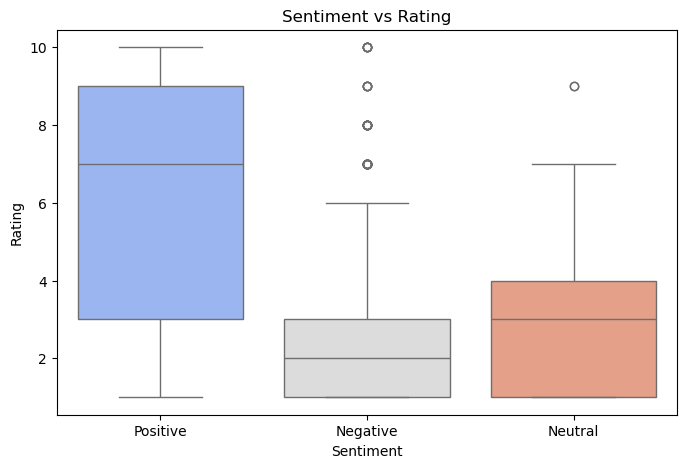

In [47]:
# Correlation between Sentiment Score and Ratings
plt.figure(figsize=(8, 5))
sns.boxplot(x='sentiment', y='rating', data=df, palette='coolwarm')
plt.title('Sentiment vs Rating')
plt.xlabel('Sentiment')
plt.ylabel('Rating')
plt.show()


C:\Users\eddsw\AppData\Local\Temp\ipykernel_19636\3005612281.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['sentiment'], palette='coolwarm')


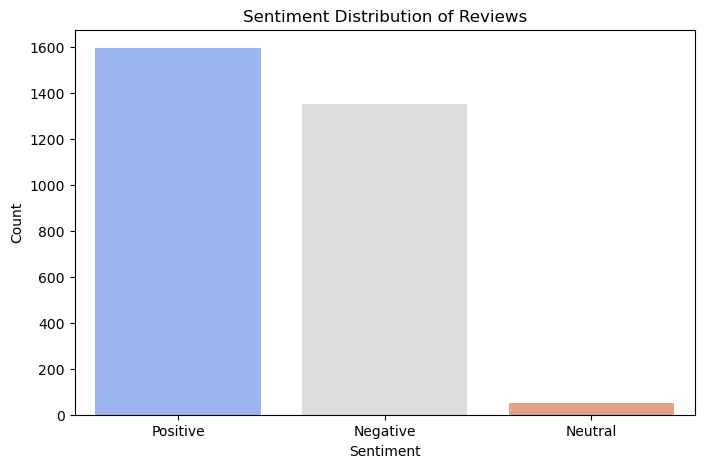

In [98]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['sentiment'], palette='coolwarm')
plt.title("Sentiment Distribution of Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

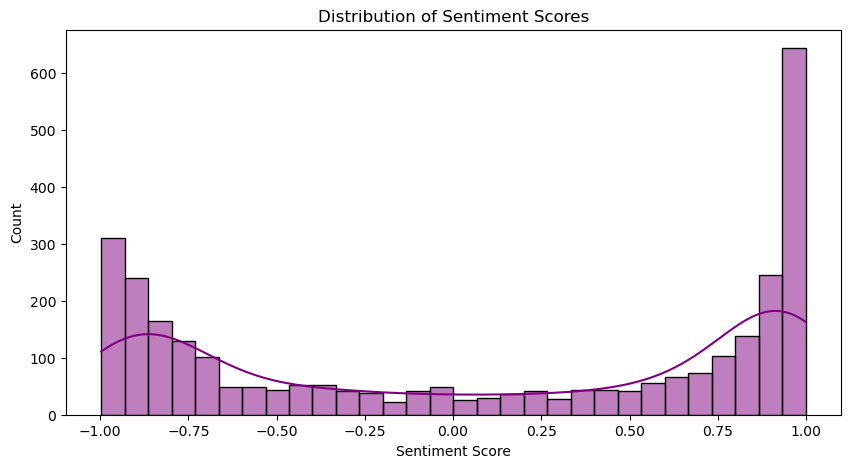

In [51]:
plt.figure(figsize=(10,5))
sns.histplot(df['sentiment_score'], bins=30, kde=True, color="purple")
plt.title("Distribution of Sentiment Scores")
plt.xlabel("Sentiment Score")
plt.ylabel("Count")
plt.show()

<Figure size 1800x600 with 0 Axes>

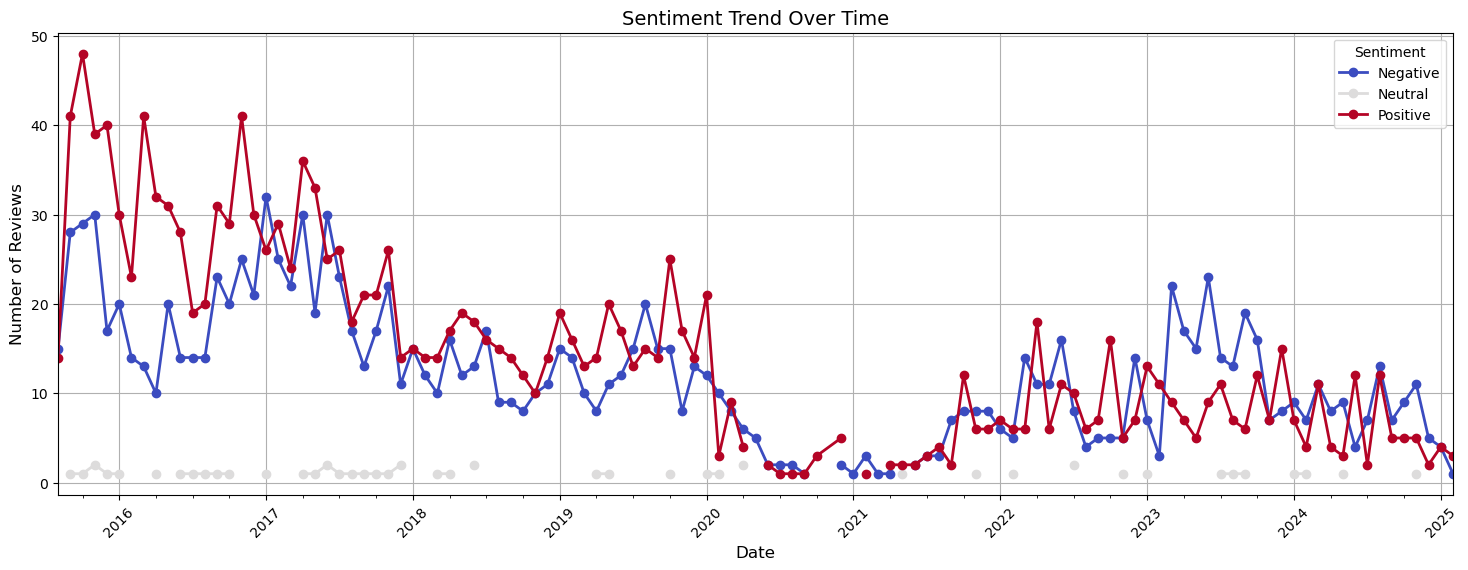

In [96]:
# Convert date column to datetime if available
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Aggregate sentiment counts over time
sentiment_trend = df.groupby(df['date'].dt.to_period("M"))['sentiment'].value_counts().unstack()

# Plot the trend 
plt.figure(figsize=(18, 6)) 
sentiment_trend.plot(kind='line', marker='o', colormap='coolwarm', linewidth=2, figsize=(18, 6))
plt.title('Sentiment Trend Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

C:\Users\eddsw\AppData\Local\Temp\ipykernel_19636\827766993.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['rating'], y=df['sentiment_score'], palette='coolwarm')


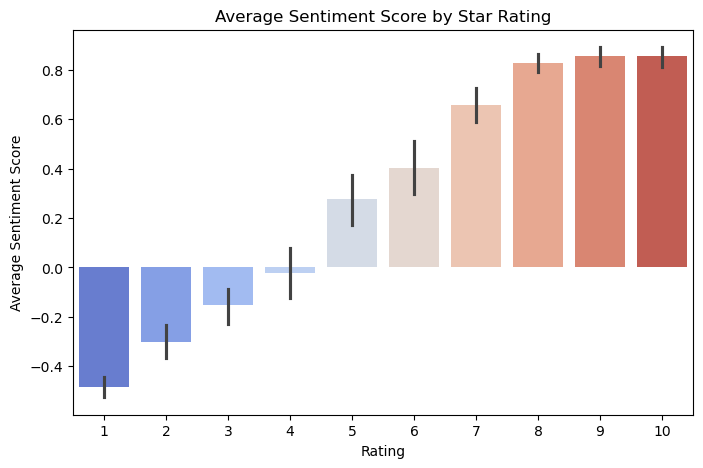

In [57]:
plt.figure(figsize=(8, 5))
sns.barplot(x=df['rating'], y=df['sentiment_score'], palette='coolwarm')
plt.title('Average Sentiment Score by Star Rating')
plt.xlabel('Rating')
plt.ylabel('Average Sentiment Score')
plt.show()

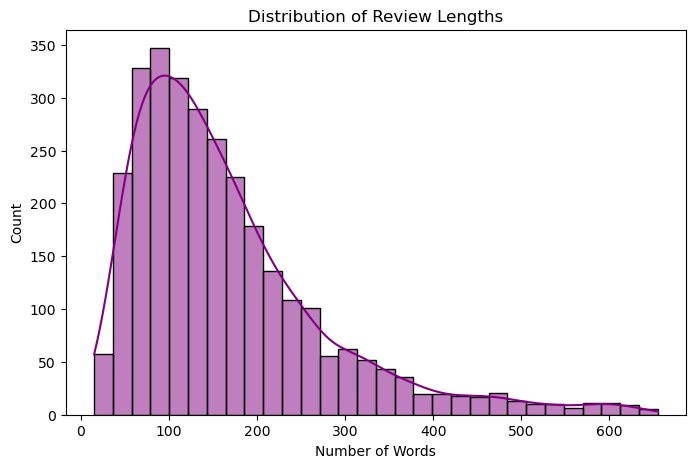

In [59]:
df['review_length'] = df['content'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(8, 5))
sns.histplot(df['review_length'], bins=30, kde=True, color='purple')
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Count')
plt.show()


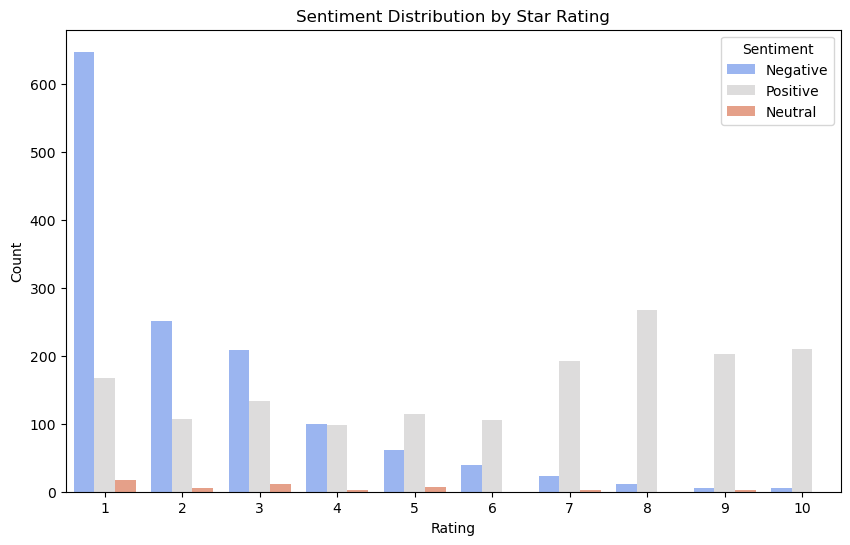

In [65]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='rating', hue='sentiment', palette='coolwarm')
plt.title('Sentiment Distribution by Star Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()


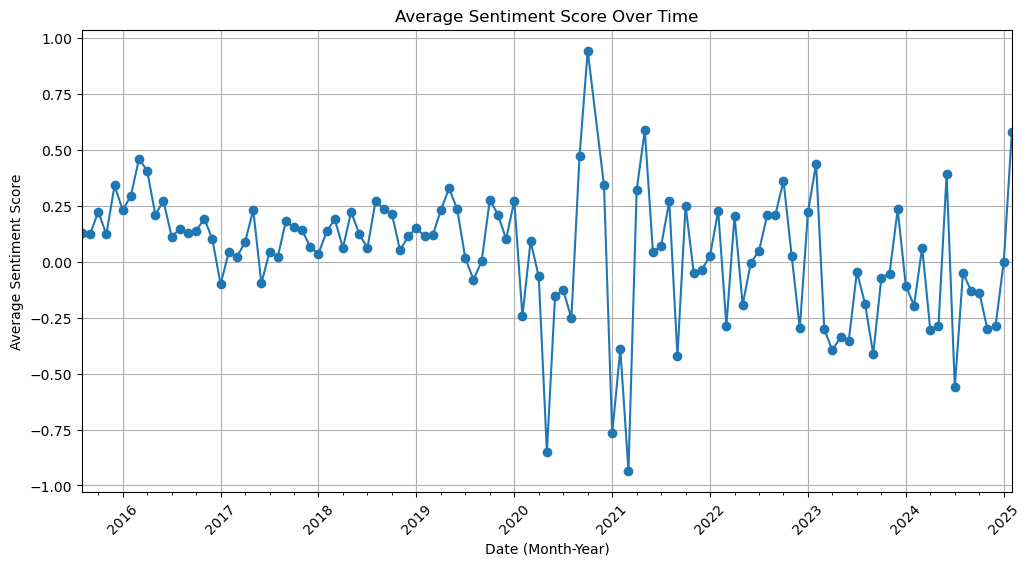

In [85]:
df['date'] = pd.to_datetime(df['date'])

plt.figure(figsize=(12, 6))
df.groupby(df['date'].dt.to_period('M'))['sentiment_score'].mean().plot(marker='o', linestyle='-')
plt.title('Average Sentiment Score Over Time')
plt.xlabel('Date (Month-Year)')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.grid()
plt.show()
